In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
data=pd.read_csv('.../../DATA/Bank_Personal_Loan_Modelling.csv')


In [9]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
data.shape

(5000, 14)

In [13]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [15]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [20]:
for col in data:
    print (col)
    print(data[col].unique())

ID
[   1    2    3 ... 4998 4999 5000]
Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [35]:
data[data['Experience']< 0]
# There shouldn't be a negative professional experience - need to be careful when using this in modelling

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [39]:
data1 = data.drop(data[data['Experience'] < 0].index)
data1.shape

(4948, 14)

In [41]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


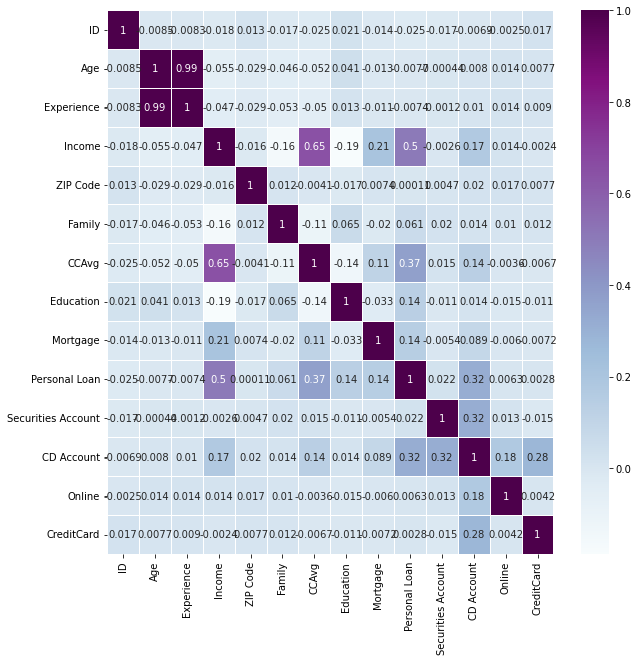

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

Very strong correlation with Age and Experience - Drop the Experience feature
There is moderate correlation between income, CC Avg with the personal loan

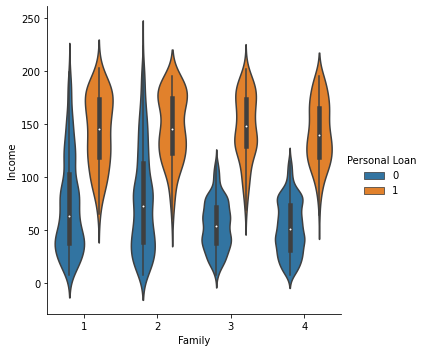

In [55]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = data, kind='violin')

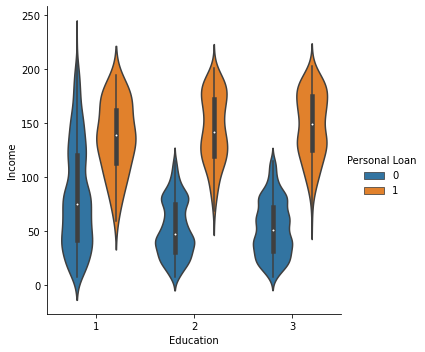

In [56]:
sns.catplot(x='Education', y='Income', hue='Personal Loan', data = data, kind='violin')

It seems that customers who are Graduate/Professional AND earning more than 100K are all taking personal loans, while a fair chunk of undergraduate earning above 100K still does not have personal loans.

<AxesSubplot:xlabel='CreditCard', ylabel='CD Account'>

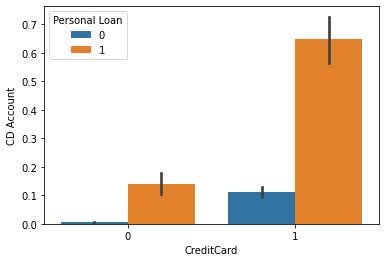

In [64]:
sns.barplot(y="CD Account", x="CreditCard", data=data,hue='Personal Loan')

<AxesSubplot:xlabel='CD Account', ylabel='count'>

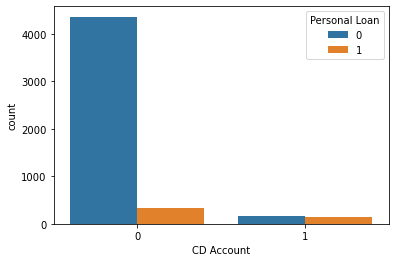

In [87]:
sns.countplot(x="CD Account", hue = 'Personal Loan', data=data)


If you have Credit Account, there's a good chance you have a personal loan

<AxesSubplot:xlabel='Online', ylabel='count'>

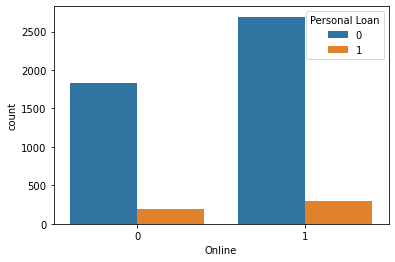

In [82]:
sns.countplot(x="Online", hue = 'Personal Loan', data=data)


<AxesSubplot:xlabel='Securities Account', ylabel='count'>

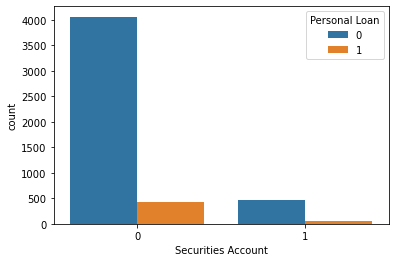

In [85]:
sns.countplot(x="Securities Account", hue = 'Personal Loan', data=data)

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

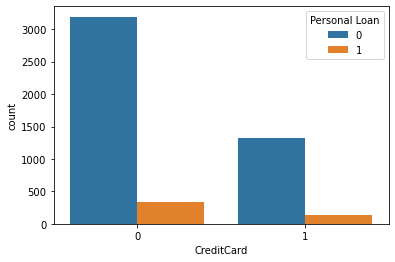

In [86]:
sns.countplot(x="CreditCard", hue = 'Personal Loan', data=data)

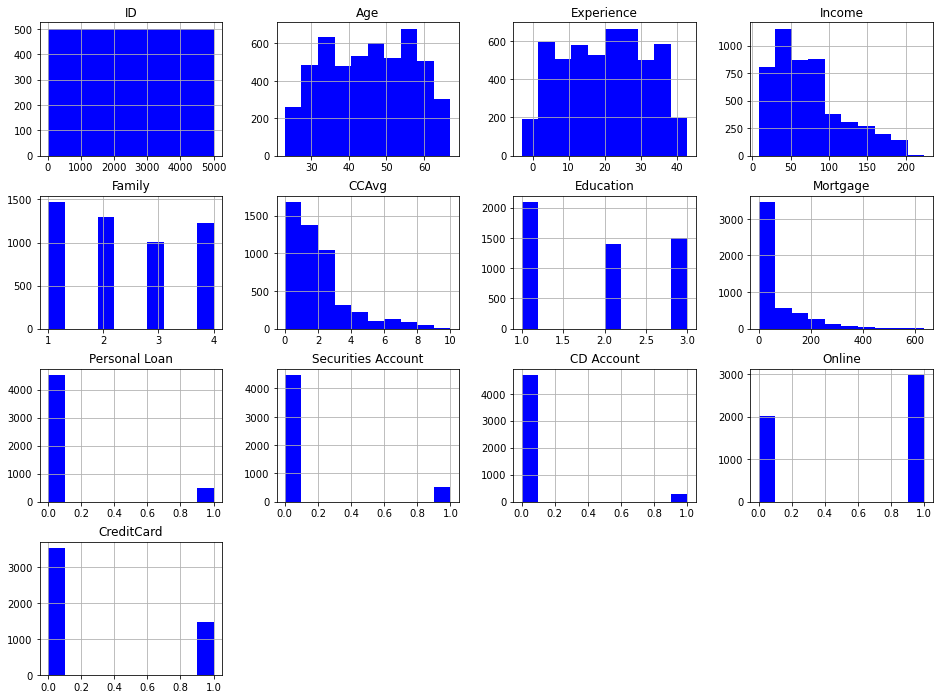

In [88]:
data.hist(bins=10 ,figsize=(16,12), color = 'Blue')
plt.show()

Detecting Imbalanced Data

In [90]:
loan_counts = pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


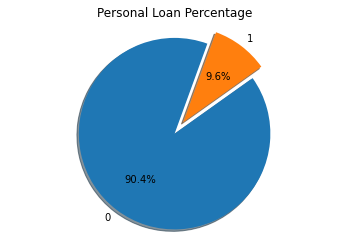

In [92]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
fig1.patch.set_facecolor('white')
plt.show()

In [97]:
from imblearn.over_sampling import SMOTE
ms=SMOTE(random_state=1)

In [102]:
from sklearn.model_selection import train_test_split
X = data.drop(['Personal Loan', 'Experience'],axis=1).values
Y = data['Personal Loan'].values.reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 12)
y train data (3500, 1)
x test data  (1500, 12)
y test data  (1500, 1)


In [103]:
X_ms_data , y_ms_data = ms.fit_resample(X,Y)
from sklearn.model_selection import train_test_split
X_data_train_res, X_data_test_res, y_data_train_res, y_data_test_res = train_test_split(X_ms_data,y_ms_data, test_size=0.30, random_state=1)
y_data_train_ress=y_data_train_res.reshape(-1,1)
y_data_test_ress=y_data_test_res.reshape(-1,1)
print('x train bank_rel_res {}'.format(X_data_train_res.shape))
print('y train bank_rel_res {}'.format(y_data_train_ress.shape))
print('x test bank_rel_res  {}'.format(X_data_test_res.shape))
print('y test bank_rel_res  {}'.format(y_data_test_ress.shape))

x train bank_rel_res (6328, 12)
y train bank_rel_res (6328, 1)
x test bank_rel_res  (2712, 12)
y test bank_rel_res  (2712, 1)


In [109]:
lrr=LogisticRegression(solver='liblinear')
lrr.fit(X_data_train_res,y_data_train_ress)
y_data_pred_res = lrr.predict(X_data_test_res)
print(lrr.score(X_data_train_res,y_data_train_ress))
logreg_data_accuracy_res = accuracy_score(y_data_test_res, y_data_pred_res)*100
print('Logistic Regression Model Accuracy Score Sample 3.3 -whole data_resamle : %f'  % logreg_data_accuracy_res,'\n')
print(classification_report(y_data_test_res,lrr.predict(X_data_test_res)))

0.9152970922882427
Logistic Regression Model Accuracy Score Sample 3.3 -whole data_resamle : 91.076696 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1350
           1       0.91      0.92      0.91      1362

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712



In [114]:
svmm = SVC(C=4 , kernel='linear')
svmm.fit(X_data_train_res,y_data_train_ress)
print(svmm.score(X_data_train_res,y_data_train_ress))
print(svmm.score(X_data_test_res,y_data_test_ress))
y_cm_data_pred_res = svmm.predict(X_data_test_res)
CM_data_accuracy_res = accuracy_score(y_data_test_ress, y_cm_data_pred_res)*100
print('CM Model Accuracy Score Sample 3.3 - whole_data_resample : %f'  % CM_data_accuracy_res,'\n')
print(confusion_matrix(y_data_test_ress,svmm.predict(X_data_test_res)),'\n')
print(classification_report(y_data_test_ress,svmm.predict(X_data_test_res)))

0.8852718078381795
0.8853244837758112
CM Model Accuracy Score Sample 3.3 - whole_data_resample : 88.532448 

[[1146  204]
 [ 107 1255]] 

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1350
           1       0.86      0.92      0.89      1362

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



In [119]:
ganb= GaussianNB()
ganb.fit(X_data_train_res,y_data_train_ress)
print(ganb.score(X_data_train_res,y_data_train_ress))
print(ganb.score(X_data_test_res,y_data_test_ress))
y_gnb_data_pred_res = ganb.predict(X_data_test_res)
GNB_data_accuracy_res = accuracy_score(y_data_test_ress, y_gnb_data_pred_res)*100
print('NB Model Accuracy Score Sample 3.3 - Whole-Data_resample : %f'  % GNB_data_accuracy_res,'\n')
print(classification_report(y_data_test_ress,ganb.predict(X_data_test_res)))

0.8893805309734514
0.8842182890855457
NB Model Accuracy Score Sample 3.3 - Whole-Data_resample : 88.421829 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1350
           1       0.89      0.87      0.88      1362

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



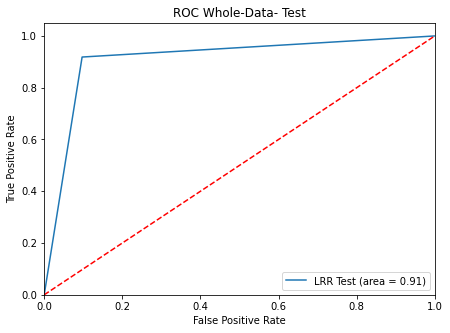

In [124]:
lrr_roc_auc_test_res = roc_auc_score(y_data_test_res, lrr.predict(X_data_test_res))
fpr, tpr, thresholds = roc_curve(y_data_test_res, lrr.predict(X_data_test_res))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='LRR Test (area = %0.2f)' % lrr_roc_auc_test_res)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Whole-Data- Test')
plt.legend(loc="lower right")
plt.show()

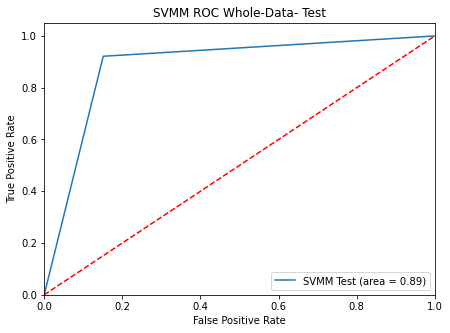

In [126]:
svmm_roc_auc_test_res = roc_auc_score(y_data_test_res, svmm.predict(X_data_test_res))
fpr, tpr, thresholds = roc_curve(y_data_test_res, svmm.predict(X_data_test_res))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='SVMM Test (area = %0.2f)' % svmm_roc_auc_test_res)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVMM ROC Whole-Data- Test')
plt.legend(loc="lower right")
plt.show()

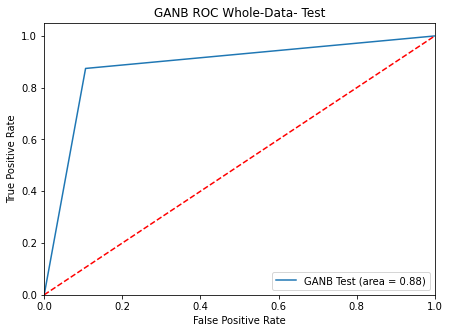

In [128]:
ganb_roc_auc_test_res = roc_auc_score(y_data_test_res, ganb.predict(X_data_test_res))
fpr, tpr, thresholds = roc_curve(y_data_test_res, ganb.predict(X_data_test_res))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='GANB Test (area = %0.2f)' % ganb_roc_auc_test_res)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GANB ROC Whole-Data- Test')
plt.legend(loc="lower right")
plt.show()

In [133]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lrr, X, Y, cv = 5, scoring = 'accuracy'))

0.9094

In [138]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(svmm, X, Y, cv = 5, scoring = 'accuracy'))

0.9108

In [136]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(ganb, X, Y, cv = 5, scoring = 'accuracy'))

0.8874000000000001